<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---


NOTE: All CSVs are in the same directory as this notebook

In [2]:
# loaded sat_scores as sat. The dataset seems to be comprised of states as abbreviations, verbal scores, math scores, 
# and the rate of each state.
sat = pd.read_csv('sat_scores.csv')
sat

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [3]:
#The types in the dataframe are integers and objects. Obviously the state is an object since it is text.
#The others are numbers which would make sense since they are integers.
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
# The data below describes what the verbal and math scores are of the SATs for that particular state.
# The Verbal and Math scores seem be the average scores for each state.
# The rate is the amount of students who took the test state wide.
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
# This describes what the column titles are and what the data type of each column is.
sat.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [6]:
# Below are the statistical scores for the SAT data.
# Interesting to take an mean of a mean since the math and verbal scores are already averages of the overall state scores.
sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [7]:
# This shows the shape of the dataset which is rows by columns. This makes sense since there are 51 states and the last row 
# is some kind of statistical anaylsis but I'm not sure what yet.
sat.shape

(52, 4)

In [8]:
# As before what the type of variables are in the dataset.
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [9]:
# This tells how many rows there are.
sat.shape[0]

52

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

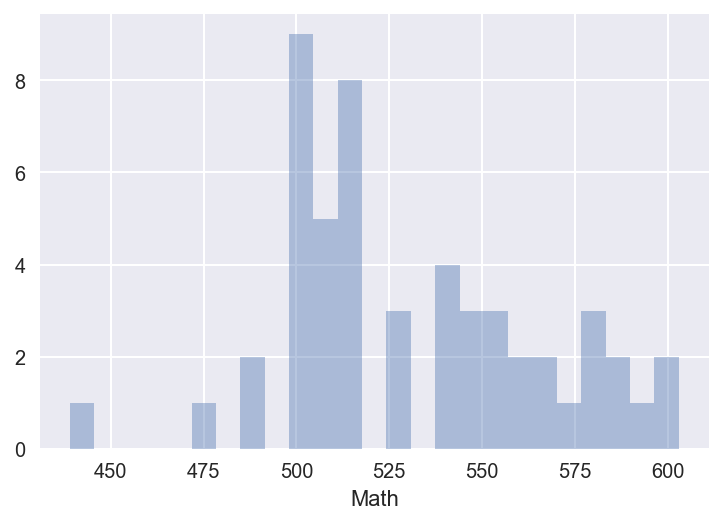

In [10]:
# I think the larger bin size gives a cleaer idea of just how many scores there are for each score set.
# The mean seems to be around 500 but there doesn't seem to be any skewness.
sns.distplot(sat['Math'], kde=False, bins = 25)
None

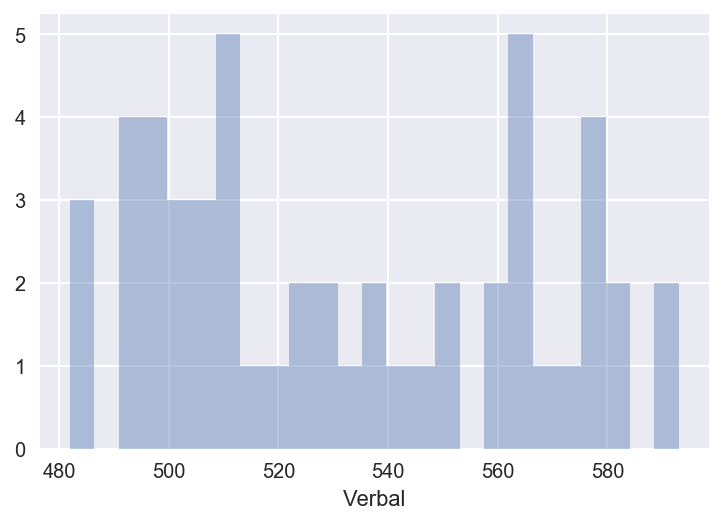

In [11]:
# Same as above, I think the larger bin size gives a clearer picture of what the data spread actually looks like. 
# This data is all over the place. There isn't much that can be determined from it yet.
sns.distplot(sat['Verbal'], kde=False, bins = 25)
None

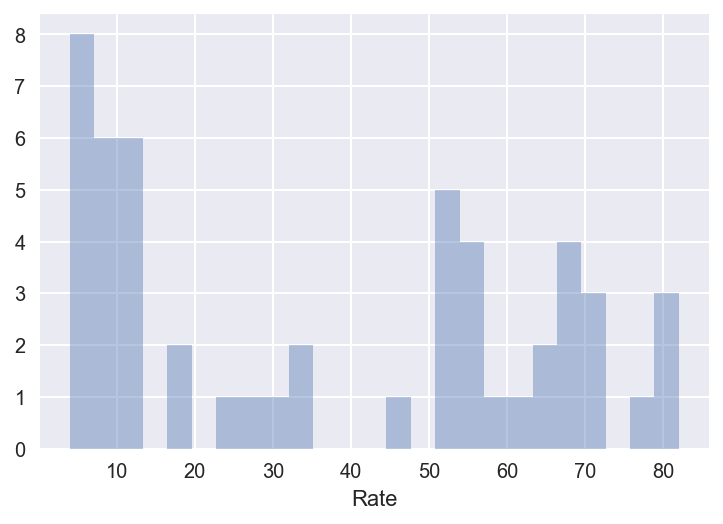

In [12]:
# The rate of students who take the SAT can clearly be seen now. There are a lot of high schoolers who don't take the SAT which
# makes me wonder whether it was becasue the students never made it to that point ie drop out rate or due to the nature of the 
# particular state's resource ie farmland, agriculture, mining etc.
sns.distplot(sat['Rate'], kde=False, bins = 25)
None

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

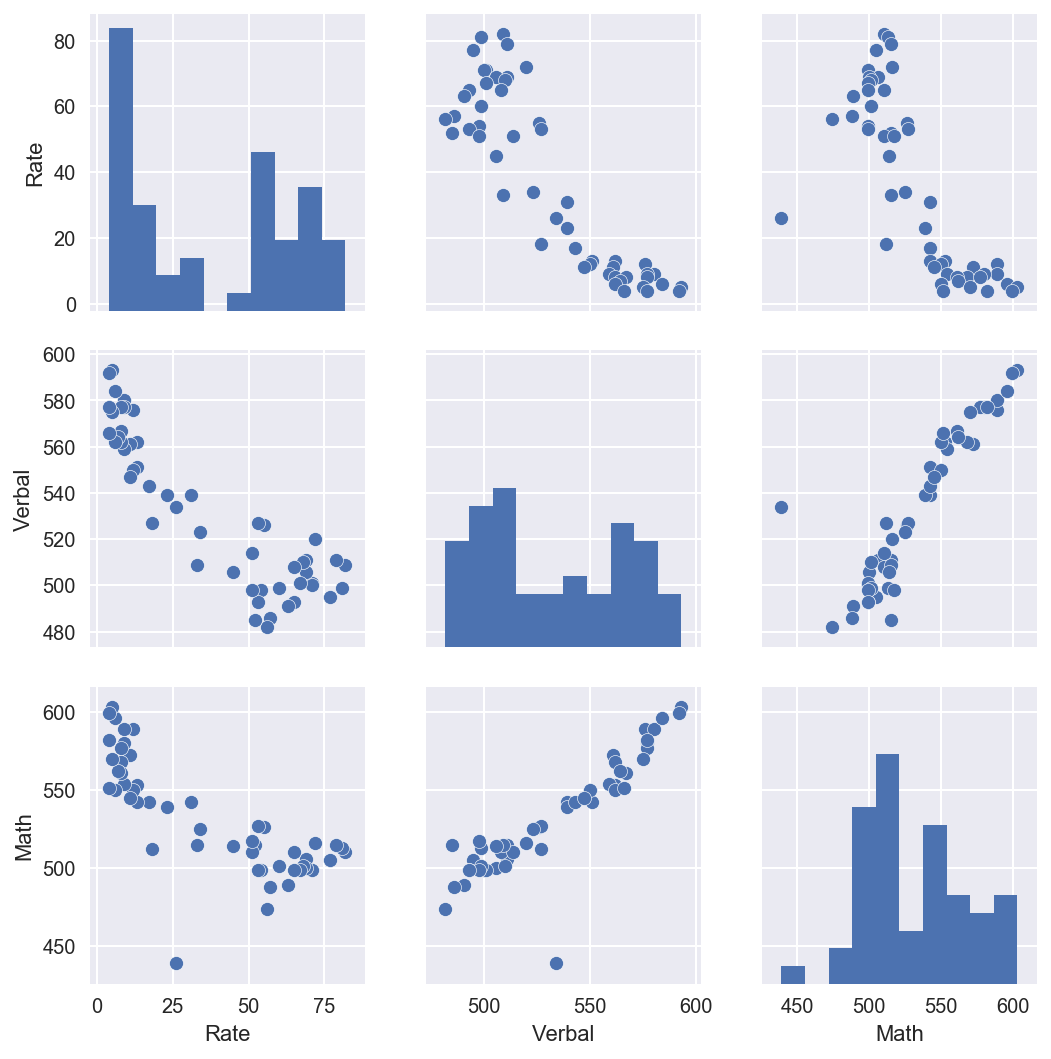

In [13]:
# This just shows all three columns and I quote from the documentation that "create a grid of Axes such that each 
# variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 
# The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of 
# the data for the variable in that column." 
# Which is great but I want to be able to tell more by breaking it down.
sns.pairplot(sat)
None

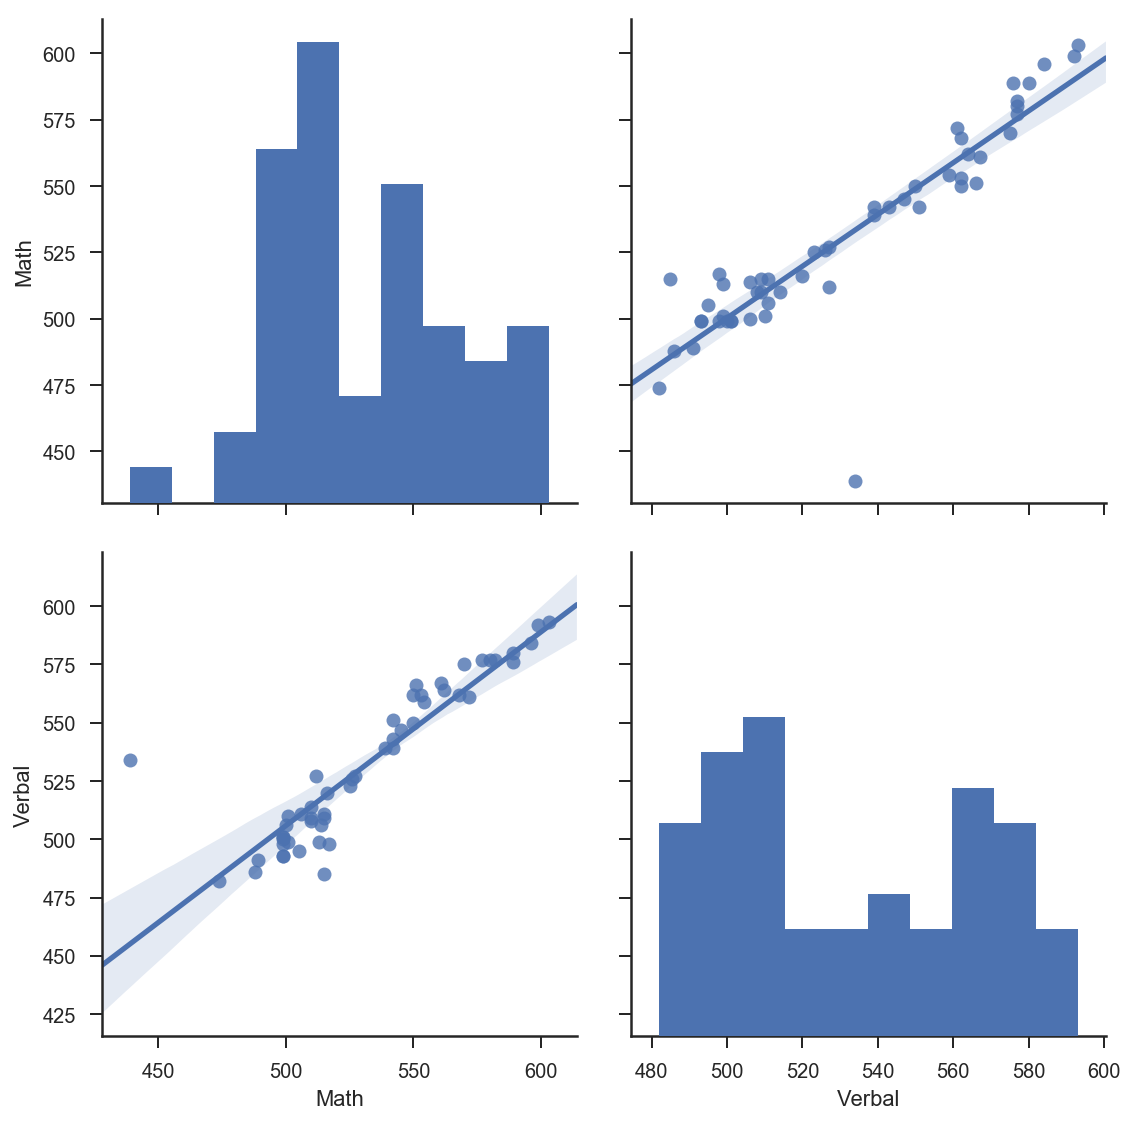

In [14]:
# From the two scatter plots we sould hope to see a correlation between math and verbal. The math and verbal scores are averages
# of the states and it is typical that students will on average do the same or at least close to the same on verbal and math and
# that's what the scatter plots show.
# The distplots show that the students have higher math scores but ther verbal seems to be more consistent. 
# There is no skewness. There are no tails. But there may be outliers as some of the dots seems to be drifting from 
# the centralized grouping.
sns.set(style="ticks", color_codes=True)
sns.pairplot(sat, size =4, vars=["Math", "Verbal"], kind= "reg")
None

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

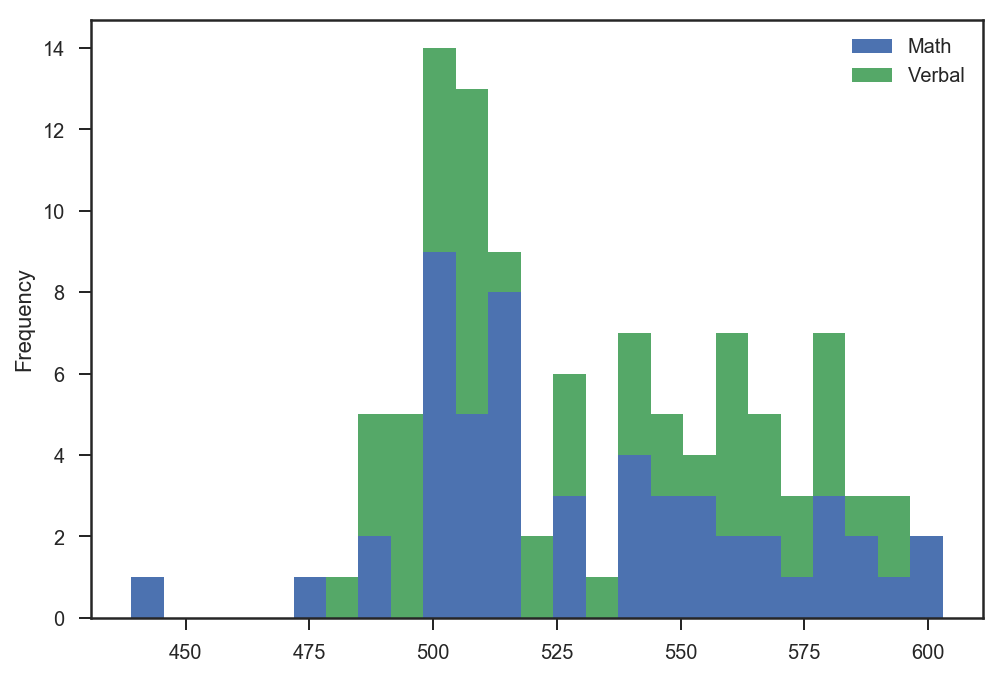

In [15]:
# Interesting a lot of the stacking is similar but don't be fooled.
# All this is saying is that students had more verbal scores in a certain range(500-515) and that the verbal scores seem
# to be more spread out while the math scores are more concentrated into certain groups and seem to be slightly higher and lower.
# One could infer the possibility of verbal being easier while math harder or that the verbal section is easier to complete then
# the math section..
sat[['Math', 'Verbal']].plot.hist(stacked=True, bins=25)
None

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

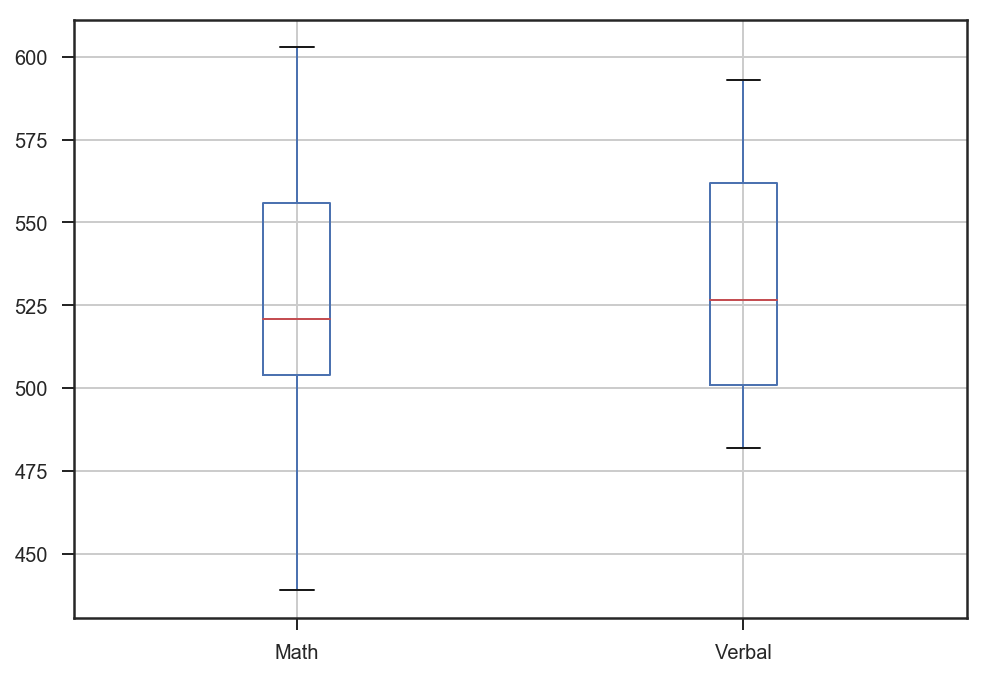

In [16]:
# The graph gives a much clearer picture of how the scores are suppose to look. Verbal and Math have a very close mean
# in relation to each other and their quatriles are similar in shape but math has a much longer tailspread. At least there don't
# seem to be any outliers.
sat[['Math', 'Verbal']].plot.box(grid=True,by=None)
None

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


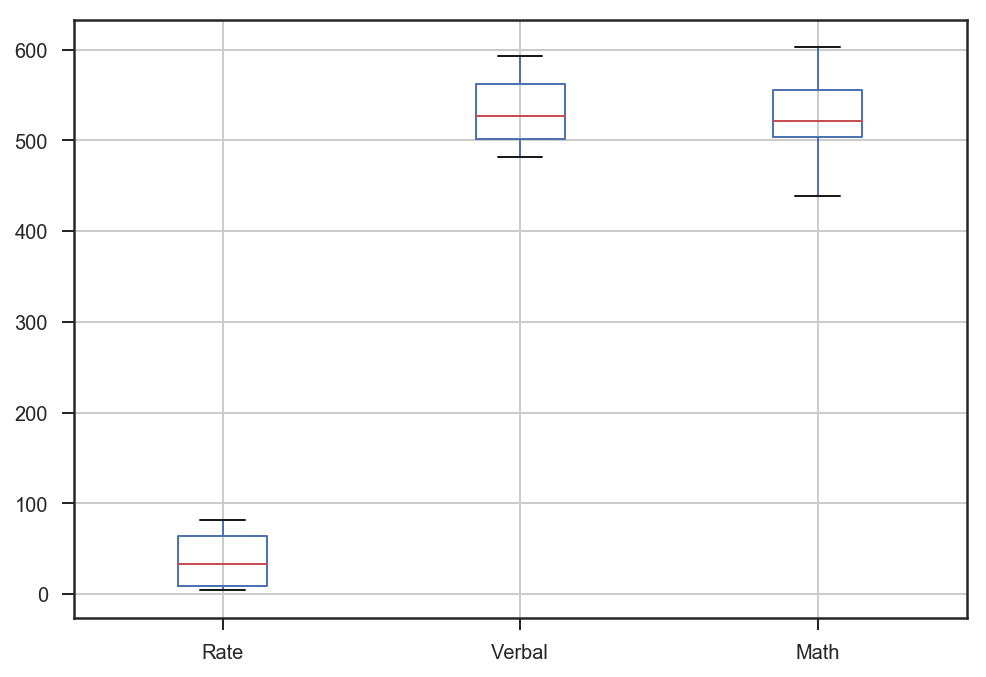

In [17]:
# It's not that the data is skewed is more like the Rate here is irrelevant. 
# It makes the box plots for the Math and verbal scores harder to analyze.
# The rate is has been determined at a different value set then the Math abd Verbal scores. I'm not sure how to change the 
# variables to make this graph show any type of correlation. I'll have to come back to this...
sat.plot.box(grid=True,by=None)
None

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
sat['Verbal'].mean()

532.0192307692307

In [19]:
# Now this is interesting. The lower half of the graph seems to have a higher mean of scores then the first half yet the rate of
# students who actually took the SAT is lower and that could be why. Smaller data set to begin with, counting for randomoness of 
# data and less variance there is less to go on so there is less to average together. With more samples gives more outliers and
# more degrees of difference between scores but it also gives more of a chance to become closer to a  normalized distribution.
state_mean_Verbal =sat[sat['Verbal'] > sat['Verbal'].mean()]
state_mean_Verbal

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
sat['Verbal'].median()

526.5

In [21]:
# This set differs slightly from the mean but it still shows the same main players. The states with lower rates of students
# taking the SATs have a median greater then that of the overall median. Again I think this has to do with a smaller sample
# size; with less data to go on its not that the numbers become skewed but there are less chances of outliers and less chances
# of differences between scoring of students.
sat_median_Verbal =sat[sat['Verbal'] > sat['Verbal'].median()]
sat_median_Verbal

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [22]:
# Just from first glance there seems to be a great differnce bewteen Verbal and Math scores. Verbal seems to be lower then Math.
sat['Verbal_Math_diff'] = sat['Verbal'] - sat['Math']
sat

,State,Rate,Verbal,Math,Verbal_Math_diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [23]:
# In this case, rate of student taking the SAT still does play a slight factor. The top three states had pretty low rates of
# students taking the SAT but the massive difference in Ohio data is very interesting. The lower 5 have a small difference
# and the rates of students taking the SATs vary so its a little confusing to try and form a correlation between the data.
sat.sort_values('Verbal_Math_diff',ascending=False).head(10)

,State,Rate,Verbal,Math,Verbal_Math_diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


In [24]:
corr_sat = sat[['Math', 'Verbal']].corr()
corr_sat

,Math,Verbal
Math,1.000000,0.899871
Verbal,0.899871,1.000000


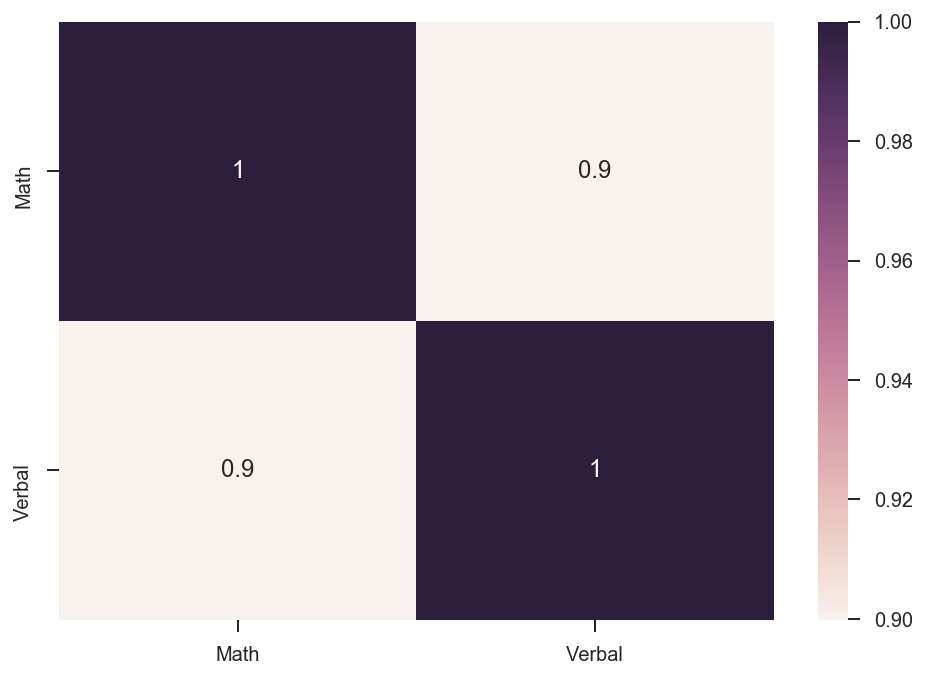

In [25]:
sns.heatmap(corr_sat, annot=True)
None

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [26]:
# Count takes a count of the rows
# Mean gives you the mean of all the columns
# STD gives the standard deviation of all the columns
# Min gives you the minimun value of the column
# Max gives you the maximun value of the column
# the 25%, 50%, and 75% are and I quote "Return value at the given quantile, a la numpy.percentile" in which the interpolation
# method is used and is set to linear by default which means the function computes the percentile along the specified axis
# with relation to the two nearest points unless working with the mipoint but usually it is preset to linear.
sat.describe()

,Rate,Verbal,Math,Verbal_Math_diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [27]:
# This is covariance matrix. The variances appear along the diagonal and the covariances along the off diagonal. You can still
# see the correlations but they are harder to comprehend becasue either the numbers are very large or very small and there is
# no centralized 1.0 correlation as in the correlation matrix which gives you almost a starting point on how to view and 
# understand your data.
sat.cov()

,Rate,Verbal,Math,Verbal_Math_diff
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal_Math_diff,-43.552036,27.499623,-219.931373,247.430995


In [28]:
# This is correlation. This is the correlation of each column compared to another and you can make out how there are correlations.
# On the diagonal the rates are all equal to 1. Math and Verbal correlate to each other well though seperately they are in the 
# negatives. This data makes more sense and is more familiar then the covariance matrix.
sat.corr()

,Rate,Verbal,Math,Verbal_Math_diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal_Math_diff,-0.101412,0.052600,-0.388219,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [29]:
# Loaded drug.csv. There is some missing data but its very few. I doubt it will make a difference but it depends on if we need
# to draw information from those columns. It seems one or two groups have some missing data but its very low.
# Decicded to change the strings so this way analysis later on would be easier.
drugs = pd.read_csv('drug-use-by-age.csv')
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [30]:
# This is the data with the '-' replaced so that all the strings are now values. The objects have been changed to floats and the
# NaN have been changed to 0.0 so all variables now have values.
drugs[['cocaine-frequency']] = drugs[['cocaine-frequency']].apply(pd.to_numeric, errors= 'coerce')
drugs[['crack-frequency']] = drugs[['crack-frequency']].apply(pd.to_numeric, errors= 'coerce')
drugs[['heroin-frequency']] = drugs[['heroin-frequency']].apply(pd.to_numeric, errors= 'coerce')
drugs[['inhalant-frequency']] = drugs[['inhalant-frequency']].apply(pd.to_numeric, errors= 'coerce')
drugs[['oxycontin-frequency']] = drugs[['oxycontin-frequency']].apply(pd.to_numeric, errors= 'coerce')
drugs[['meth-frequency']] = drugs[['meth-frequency']].apply(pd.to_numeric, errors= 'coerce')
drugs.fillna(value=0.0, inplace=True)
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [31]:
# all the objects have been converted to float64
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [32]:
# The dataset is comprised of objects floats but it has there being no null values.
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [33]:
# Gives a detailed analysis of the mean, standard deviation, min and max of the variable values.
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [34]:
# Describes the column titles
drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [35]:
# This shows the correlations of each column to each other and how they relate as an entire database.
corr_drugs = drugs[['alcohol-use', 'alcohol-frequency','marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency']].corr()
corr_drugs

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
alcohol-use,1.000000,0.897889,0.594165,0.920425,0.773458,0.260301,0.877378,0.337802,0.677614,0.396779,...,0.589219,-0.033615,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.376863,0.318268,0.091251
alcohol-frequency,0.897889,1.000000,0.260219,0.818769,0.577601,0.317172,0.785050,0.364267,0.546194,0.432405,...,0.251554,0.049388,0.448543,-0.415026,0.291766,0.260304,0.425153,0.252246,0.029867,0.201423
marijuana-use,0.594165,0.260219,1.000000,0.615610,0.883789,-0.154879,0.620670,-0.143323,0.711613,0.041377,...,0.971733,-0.180840,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.218681,0.616766,-0.277144
marijuana-frequency,0.920425,0.818769,0.615610,1.000000,0.742598,0.265193,0.892077,0.273167,0.631789,0.346001,...,0.609618,0.066200,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.417947,0.399124,0.048777
cocaine-use,0.773458,0.577601,0.883789,0.742598,1.000000,-0.077848,0.835727,-0.076876,0.899944,0.128866,...,0.865626,0.017269,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.199366,0.461914,-0.159997
cocaine-frequency,0.260301,0.317172,-0.154879,0.265193,-0.077848,1.000000,0.307329,0.872260,-0.127827,0.143095,...,-0.152548,-0.154491,-0.080911,-0.103142,-0.230324,-0.183692,-0.080921,0.240660,0.021109,0.761572
crack-use,0.877378,0.785050,0.620670,0.892077,0.835727,0.307329,1.000000,0.333440,0.750790,0.355941,...,0.603003,0.140619,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.404741,0.438421,0.091676
crack-frequency,0.337802,0.364267,-0.143323,0.273167,-0.076876,0.872260,0.333440,1.000000,-0.217811,0.335815,...,-0.187504,-0.115546,-0.080356,-0.215342,-0.219458,-0.125405,-0.070355,0.346559,0.129511,0.602101
heroin-use,0.677614,0.546194,0.711613,0.631789,0.899944,-0.127827,0.750790,-0.217811,1.000000,-0.044239,...,0.775321,0.112525,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.058656,0.333649,-0.023708
heroin-frequency,0.396779,0.432405,0.041377,0.346001,0.128866,0.143095,0.355941,0.335815,-0.044239,1.000000,...,-0.048459,-0.148807,0.070324,-0.264485,-0.051164,0.218212,-0.065298,0.782122,-0.040406,-0.191638


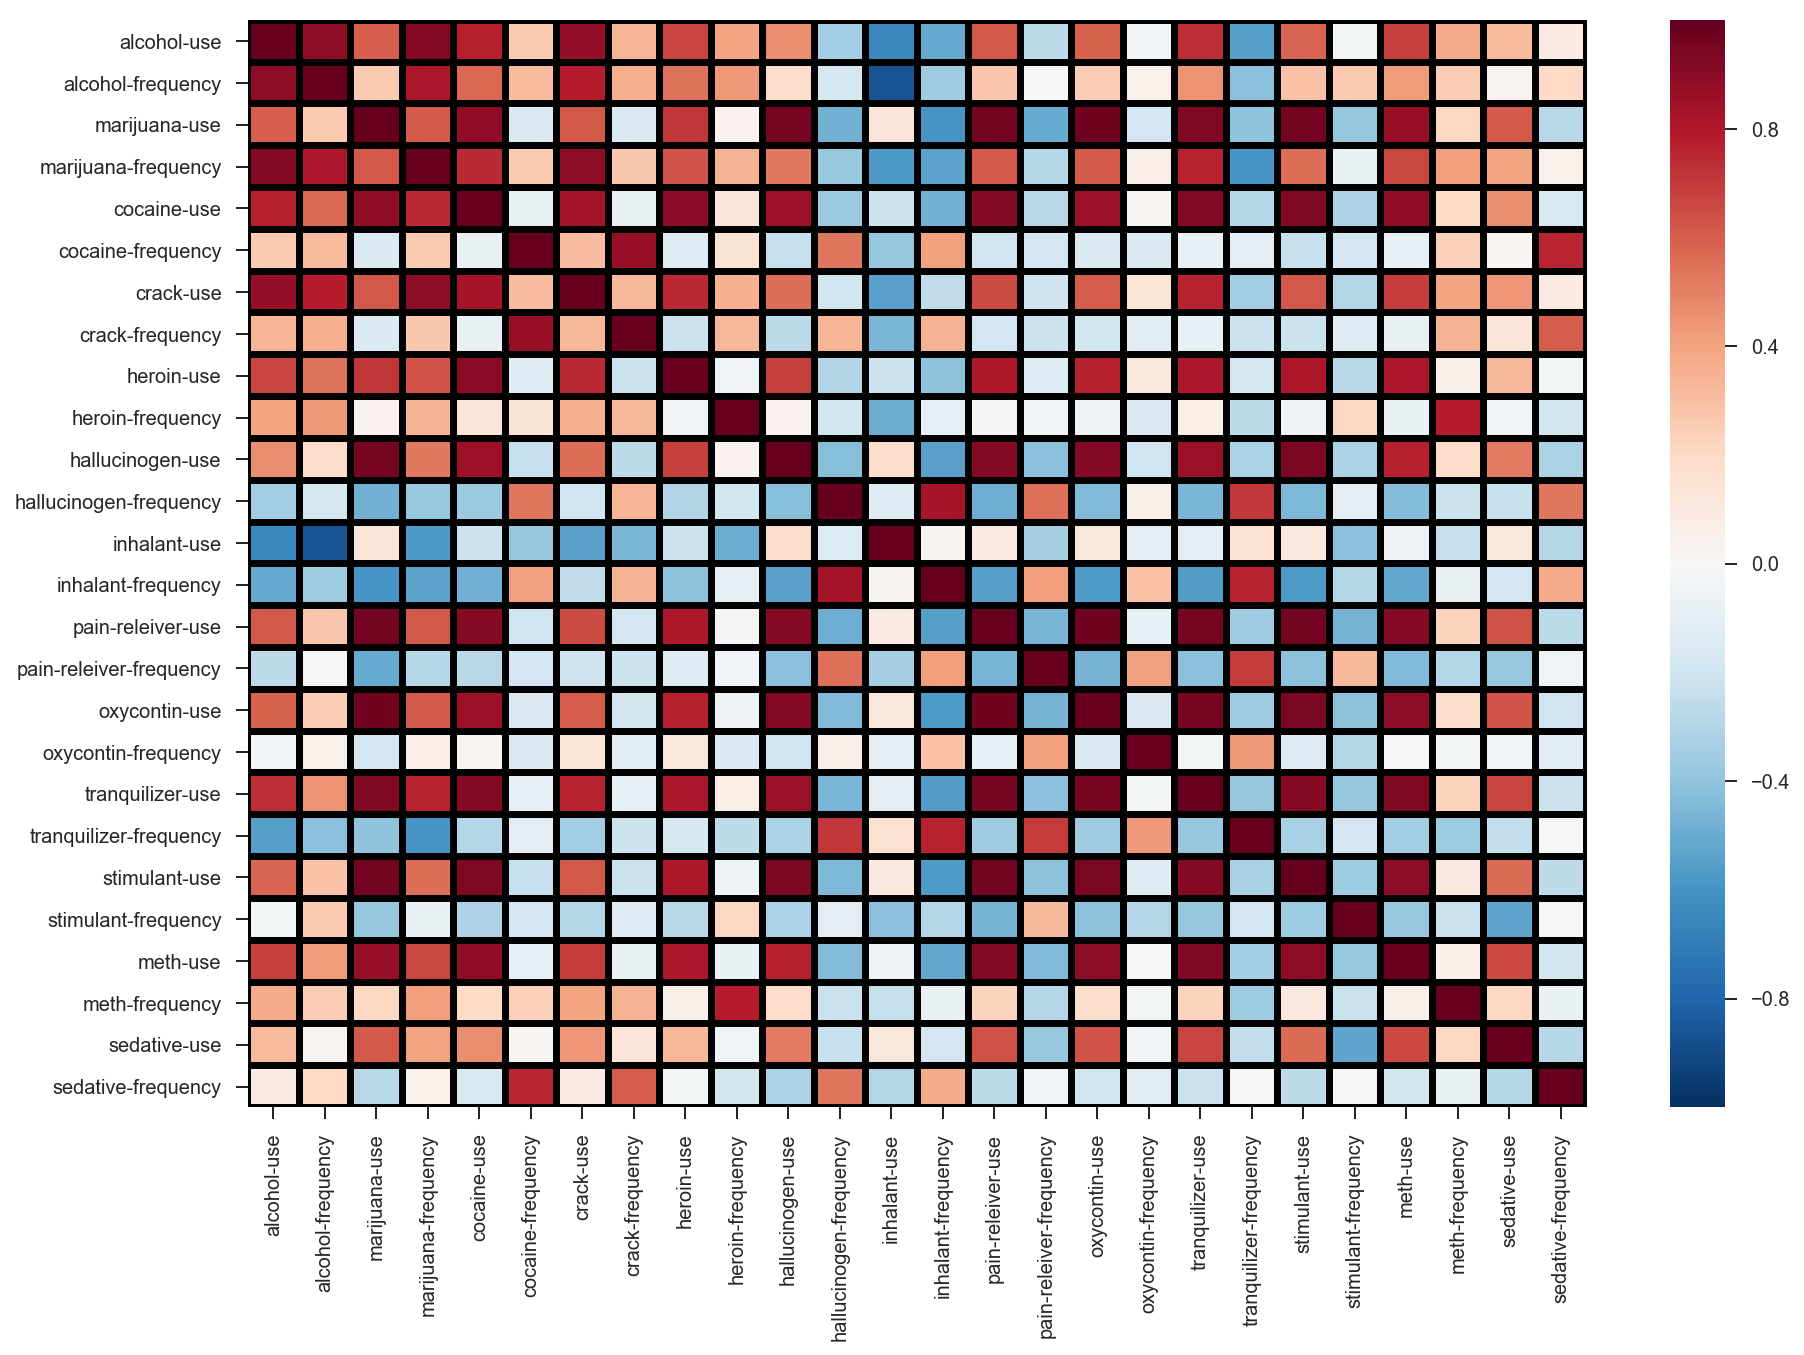

In [36]:
# There definitly seems to be a correlation between alcohol use/frequency, marijuana use/frequency, cocaine-use, crack-use, and
# herion-use, tranquilizer-use and stimulant use. 
plt.subplots(figsize=(15,10))
sns.heatmap(corr_drugs, annot=False, linecolor ='black', linewidths=3)
None

In [37]:
# Kept trying to run this but it was over loading the notebook. Also though these graphs were very interesting the one time 
# I got it to work since there were so many of them it was hard to analyze any of the data.
#sns.pairplot(drugs)

C:\Users\emmag\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


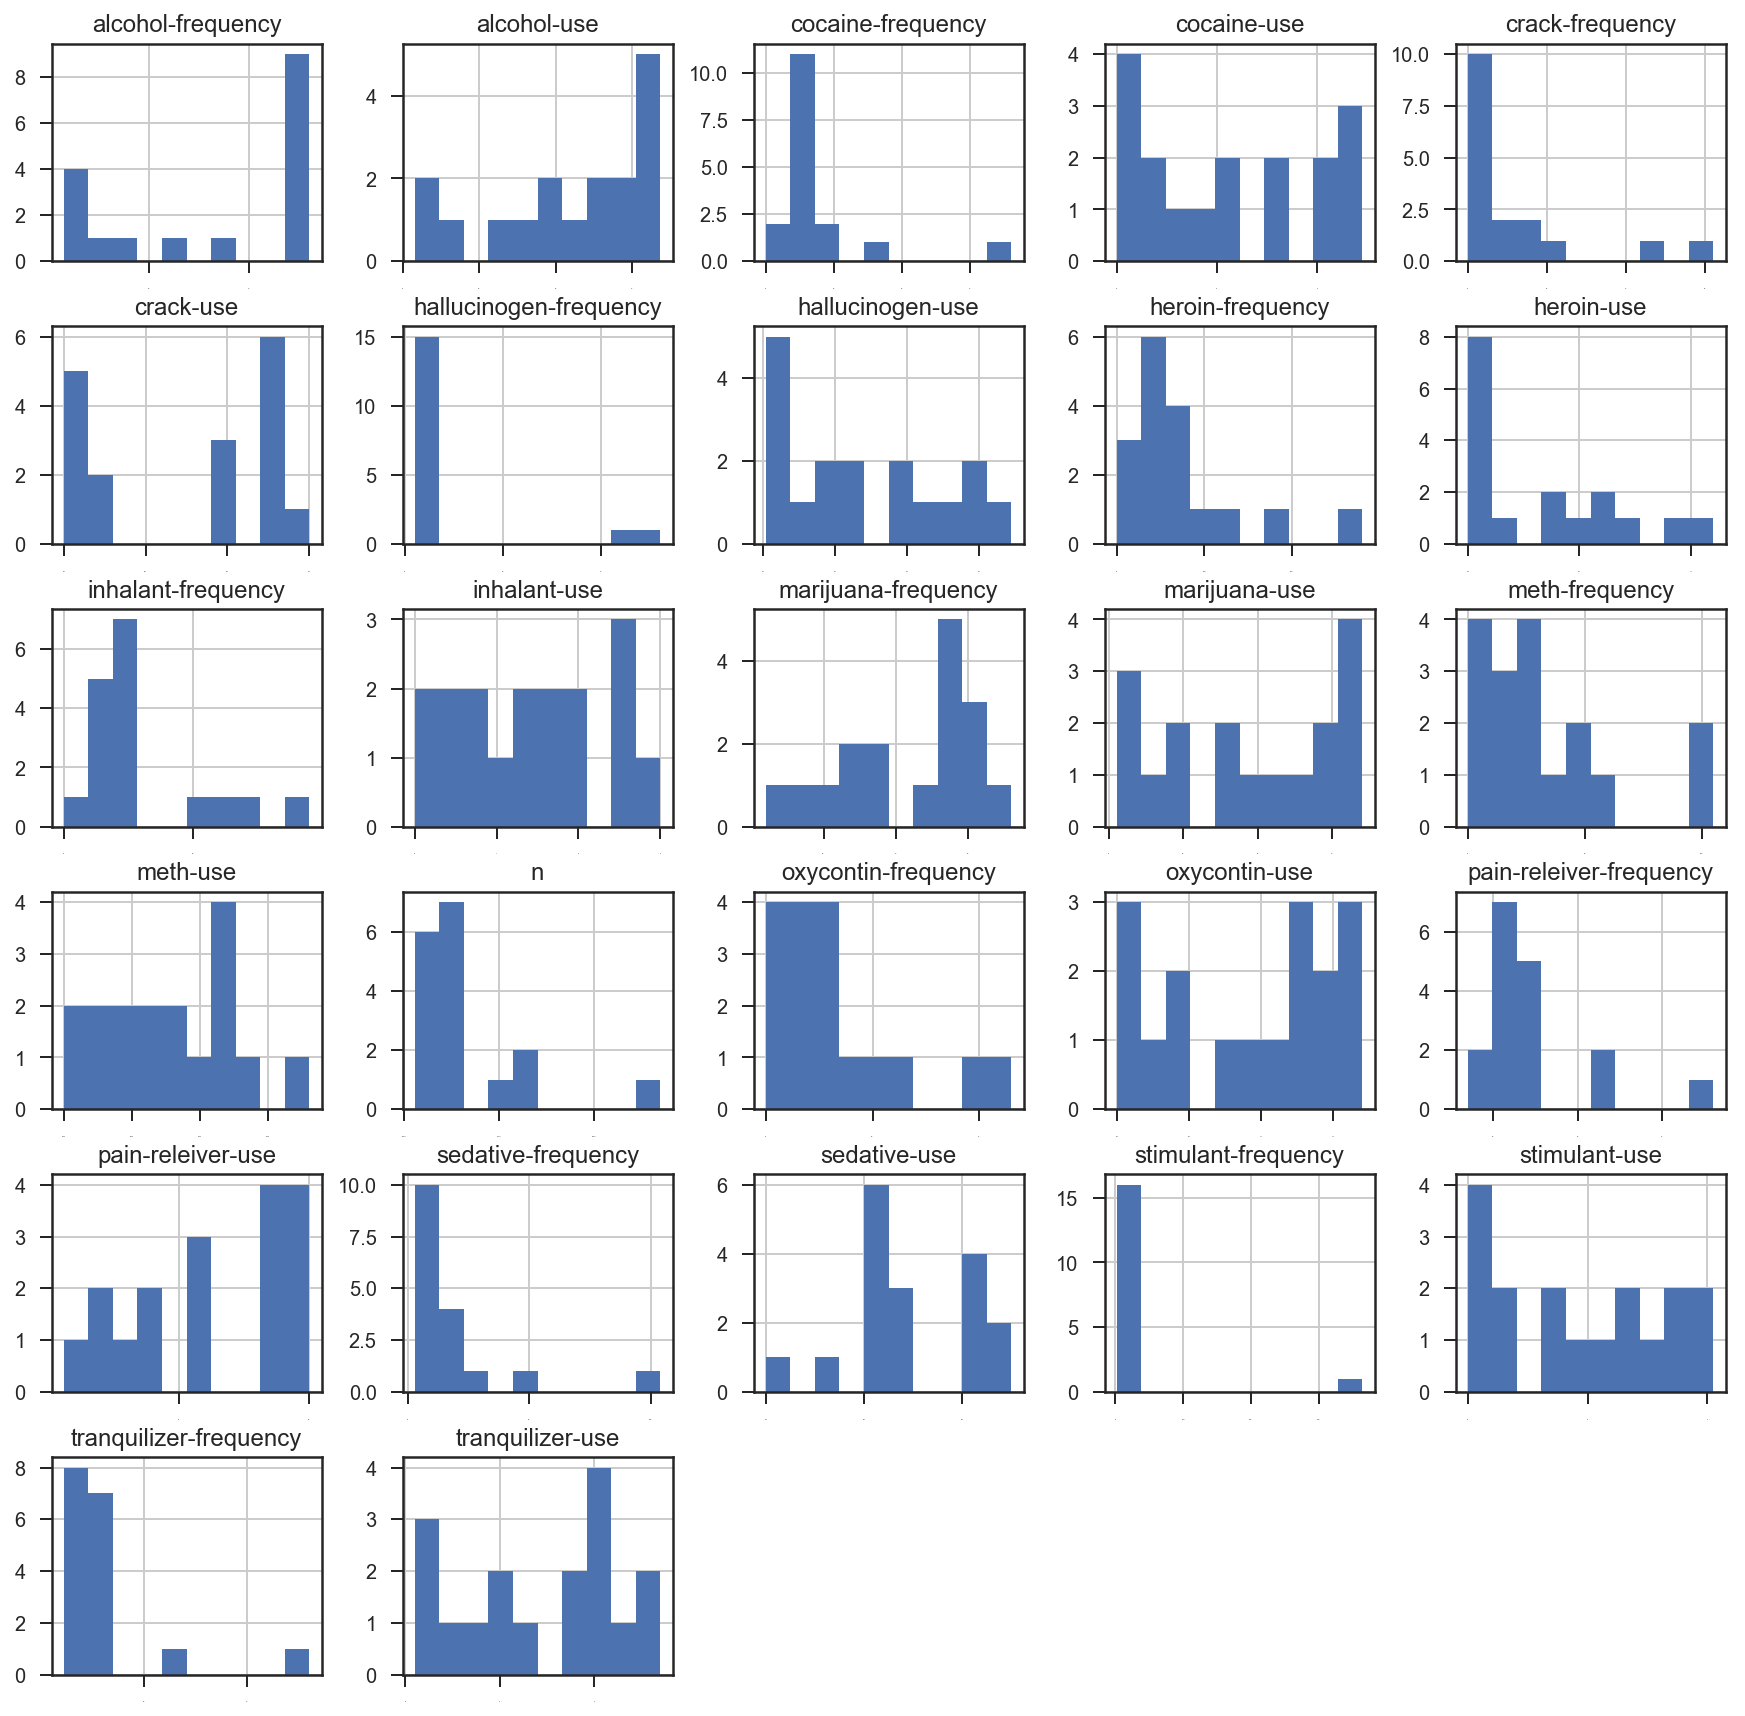

In [38]:
# This plot of graphs gives a good over view of the data. The data is starting to take shape and you can start to see where 
# some correlations are. Alcohol use and frequency both peak around the same time as does hallucinogen use and frequency
# and stimulant use and frequency.
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
drugs.hist(ax = ax , bins=10,  xlabelsize=1)
None

In [39]:
# So by age there seems to be the most usage/ frquency in the categories of alcohol, marijuana, pain-releiver, tranquilizer, 
# stimulant, and sedative.  The frequency is very high for certain drug groups such as marijuana, crack, heroin, stimulant and 
# meth which just goes to show that many people may not use but those who do use a lot.
drugs.sort_values('age', ascending=True).mean()

n                          3251.058824
alcohol-use                  55.429412
alcohol-frequency            33.352941
marijuana-use                18.923529
marijuana-frequency          42.941176
cocaine-use                   2.176471
cocaine-frequency             7.411765
crack-use                     0.294118
crack-frequency              12.382353
heroin-use                    0.352941
heroin-frequency             68.970588
hallucinogen-use              3.394118
hallucinogen-frequency        8.411765
inhalant-use                  1.388235
inhalant-frequency            5.794118
pain-releiver-use             6.270588
pain-releiver-frequency      14.705882
oxycontin-use                 0.935294
oxycontin-frequency          13.941176
tranquilizer-use              2.805882
tranquilizer-frequency       11.735294
stimulant-use                 1.917647
stimulant-frequency          31.147059
meth-use                      0.382353
meth-frequency               31.735294
sedative-use             

In [40]:
# Sorting data into usage and frequencey to compare to two and see from boxplot graphs what if any correlations can be made.
# With such a large amount to data its easier to visualize it in pieces.
drugs_usage=drugs[['age','alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]
drugs_usage

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


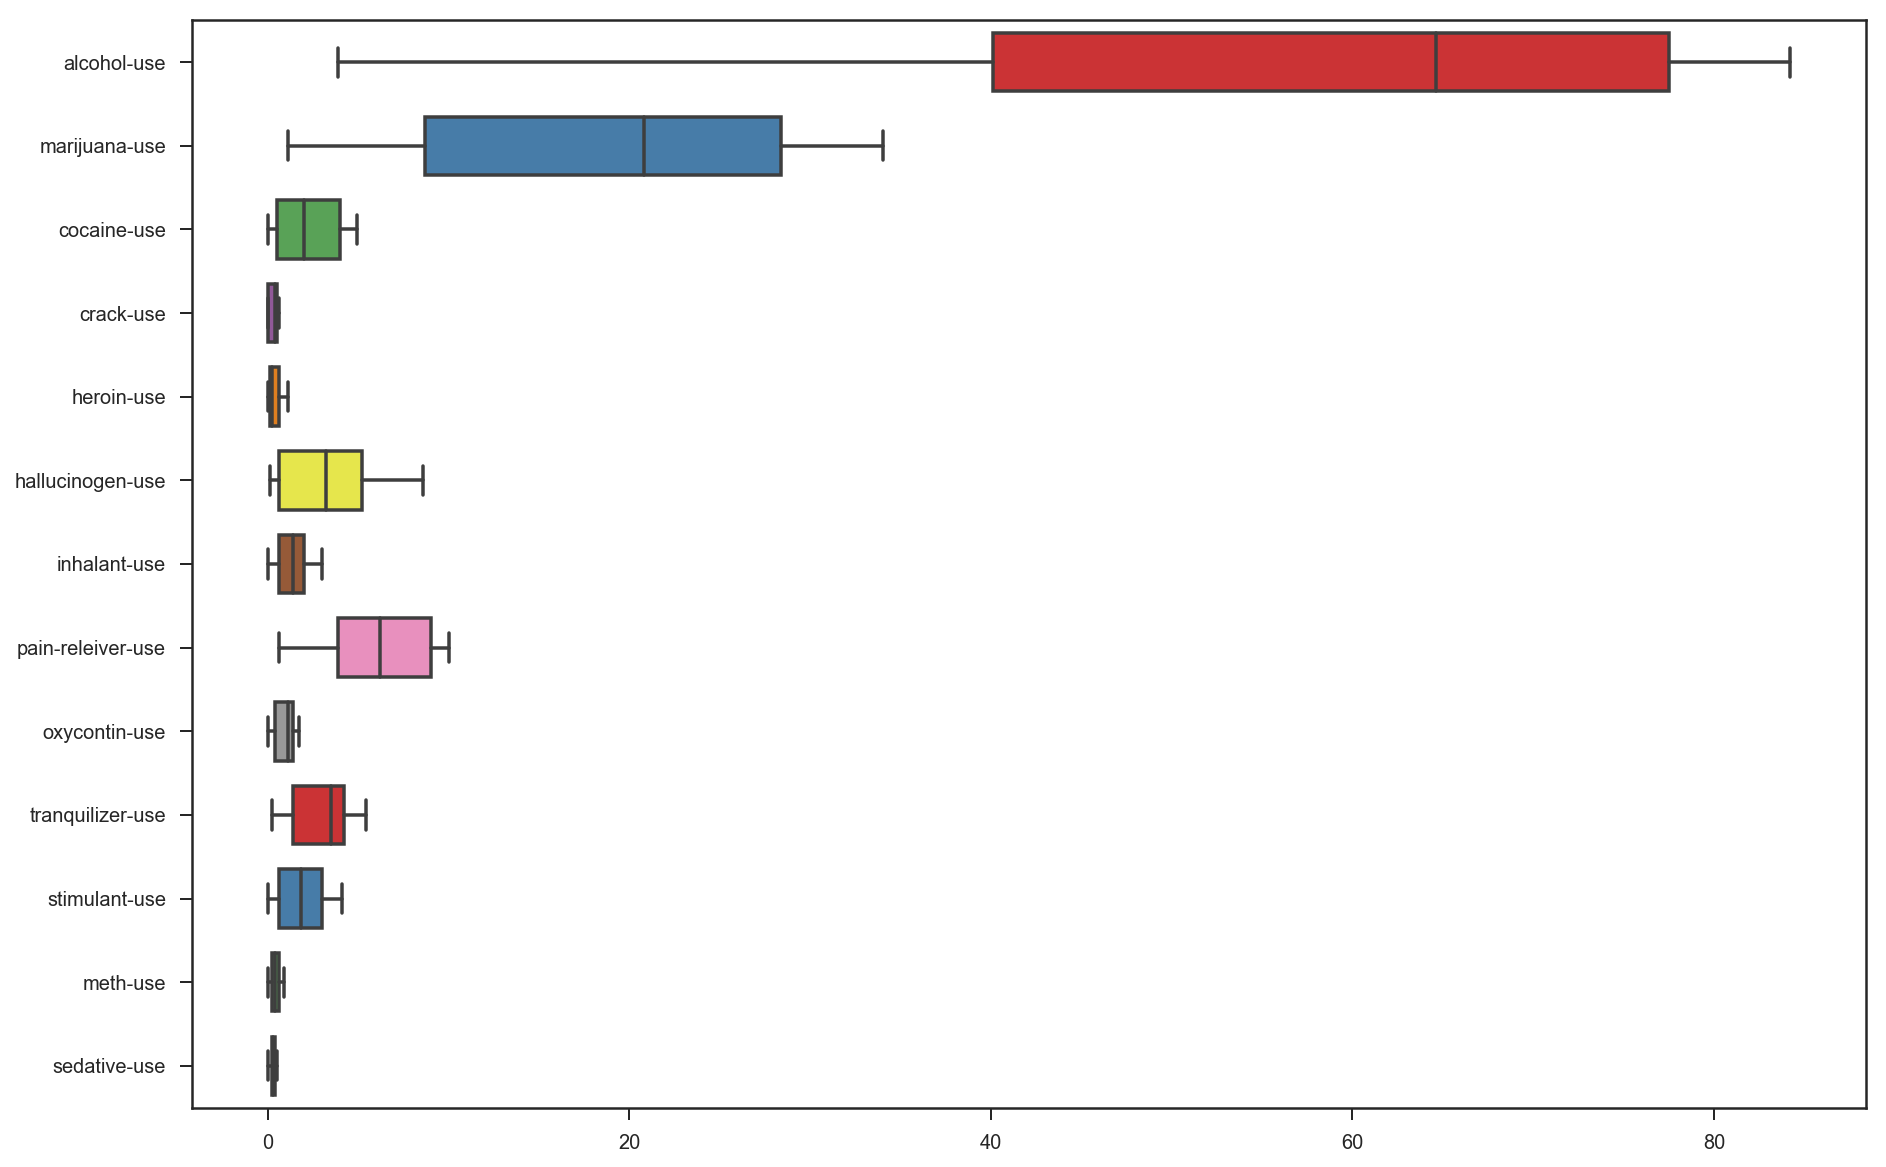

In [41]:
# There is a very high usage of alcohol and marijuana.
fig = plt.figure(figsize = (15,10))
sns.boxplot(data=drugs_usage,orient='h',palette="Set1", width=0.7)
sns.set(font_scale = 2)
None

In [42]:
drugs_frequency=drugs[['age', 'alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency', 'meth-frequency','sedative-frequency']]
drugs_frequency

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
5,17,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
6,18,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
7,19,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0
8,20,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
9,21,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0


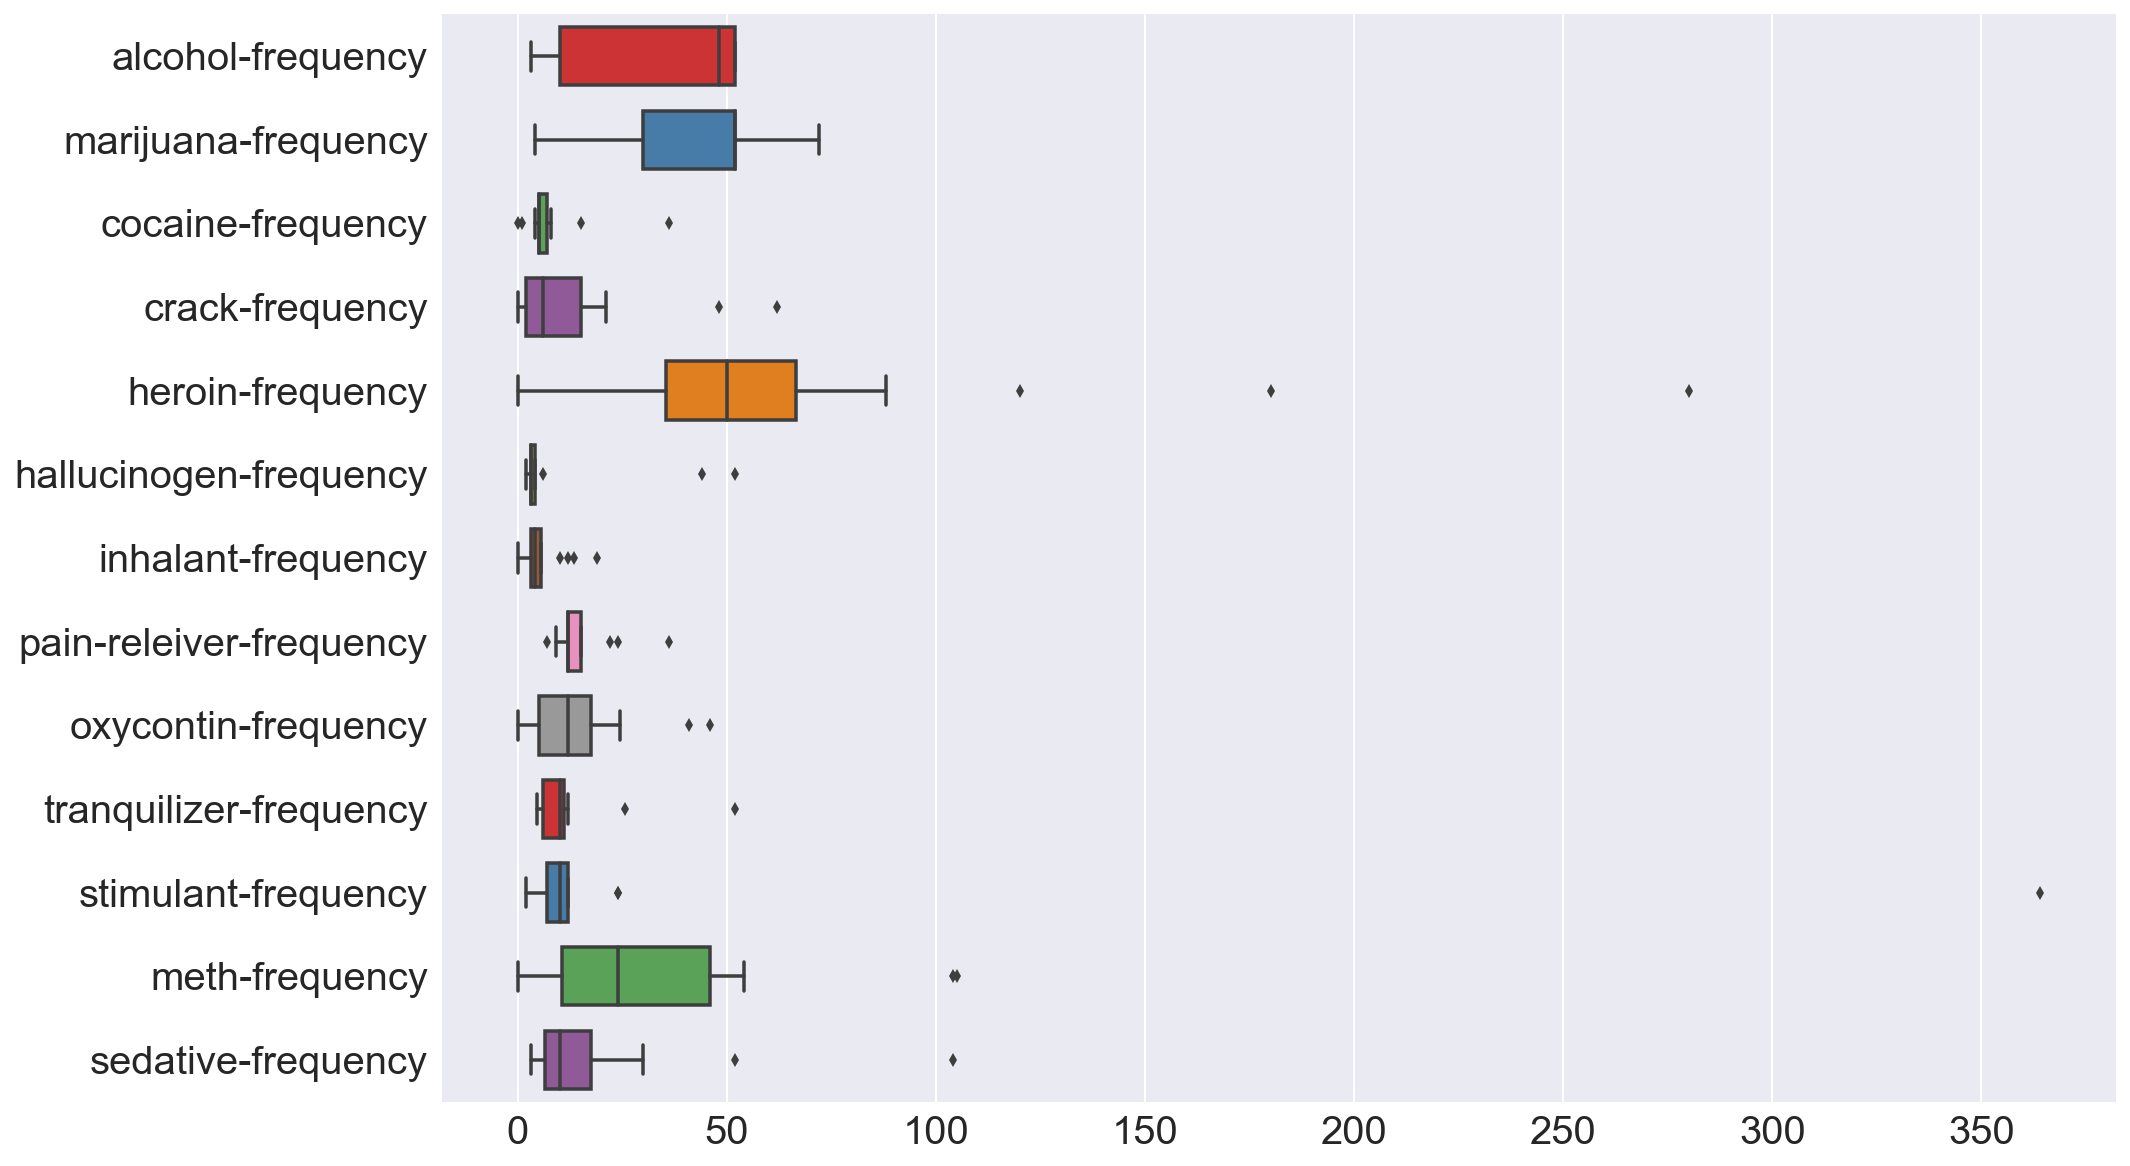

In [43]:
# Interesting how many outliers there are with frequency use.
fig = plt.figure(figsize = (15,10))
sns.boxplot(data=drugs_frequency,orient='h',palette="Set1", width=0.7)
sns.set(font_scale = 2)
None

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [44]:
# Code
# Here is the dataset specfifcally for the age range in question. From just examining the data there seems to be higher alcohol
# usage but when compared to frequency marijuana has is higher.
drugs = drugs.iloc[8:14, 0:6]
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency
8,20,2271,69.7,48.0,34.0,60.0
9,21,2354,83.2,52.0,33.0,52.0
10,22-23,4707,84.2,52.0,28.4,52.0
11,24-25,4591,83.1,52.0,24.9,60.0
12,26-29,2628,80.7,52.0,20.8,52.0
13,30-34,2864,77.5,52.0,16.4,72.0


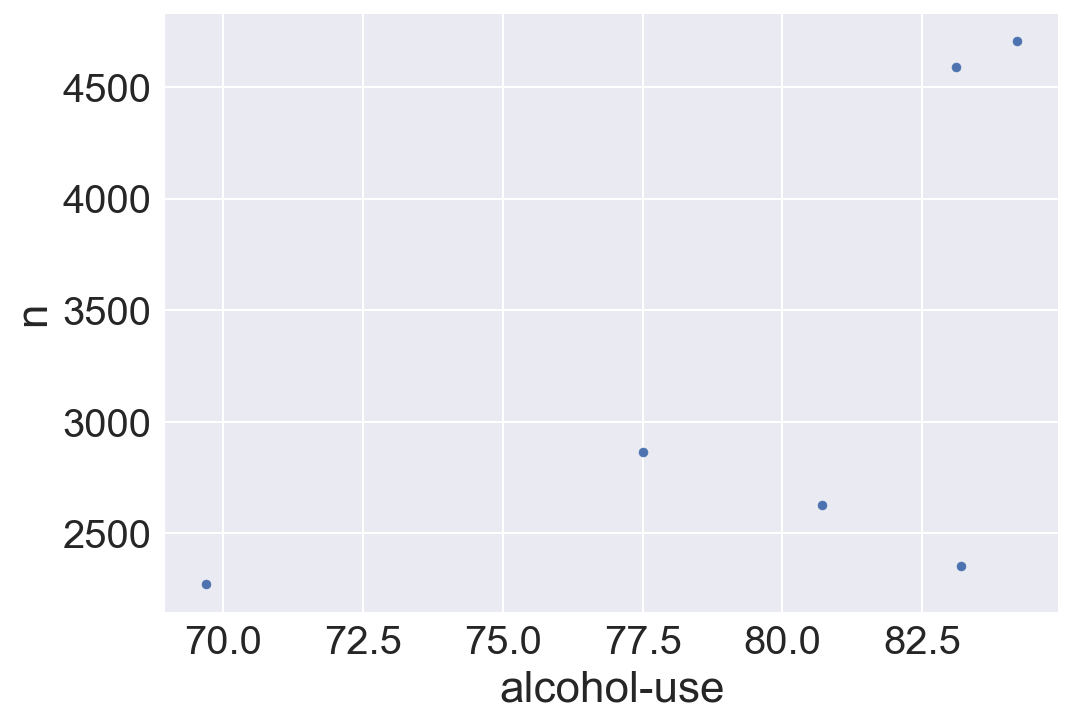

In [45]:
#From comparing the graph to the data set, there are certain age groups were alcohol use is higher.
drugs.plot('alcohol-use', 'n', kind= 'scatter', grid=True)
None

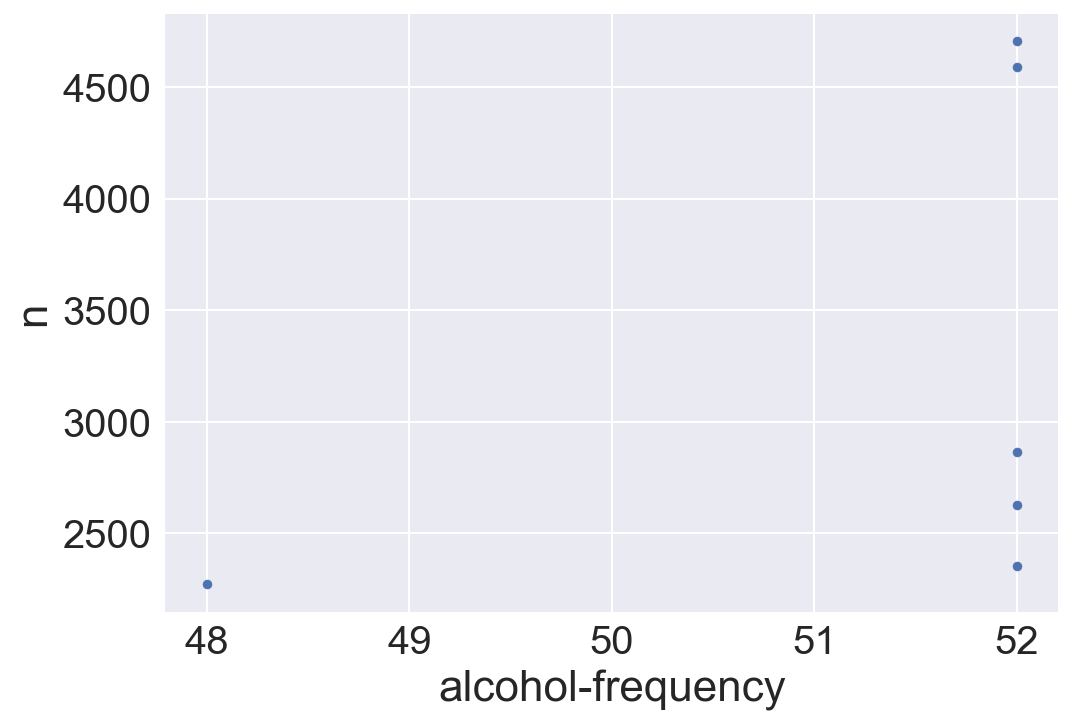

In [46]:
# comparing the dataset to the graph there is definitly certain age groups where frequency is higher
drugs.plot('alcohol-frequency', 'n', kind= 'scatter', grid=True)
None

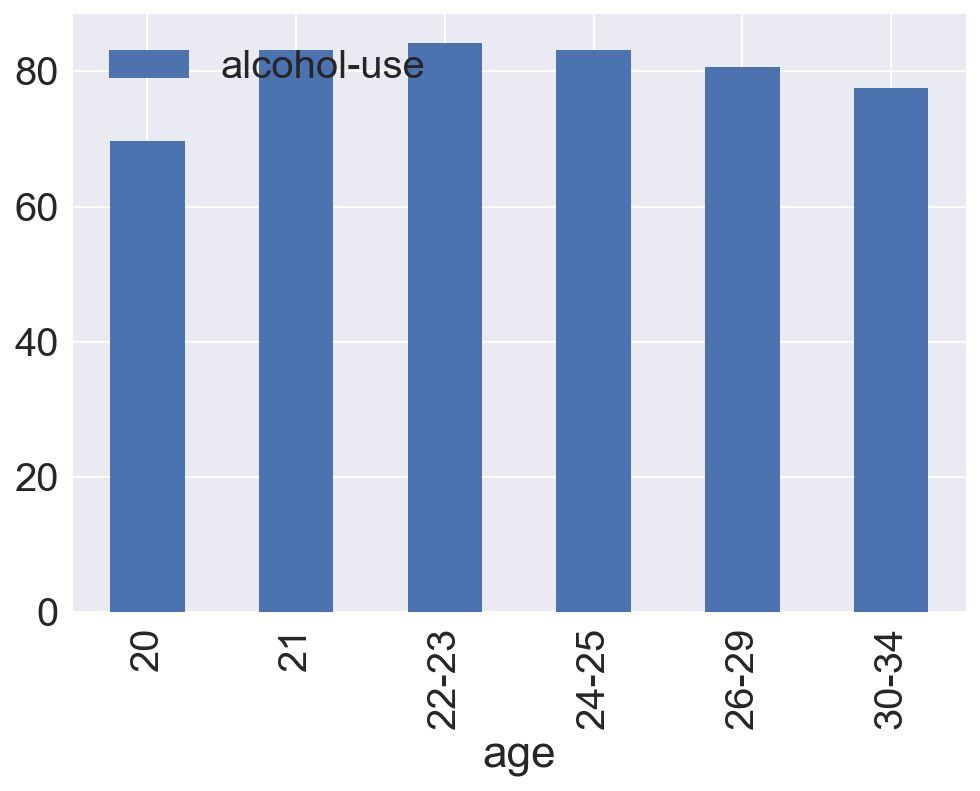

In [47]:
# the usage is very simialar for the age range, with slightly higher use once legal and in the college age. It begins to decrease
# in the thirties, but this could be due to many factors ie marriage, children, jobs, commitments etc.
drugs.plot(y="alcohol-use", x="age", kind='bar')
None

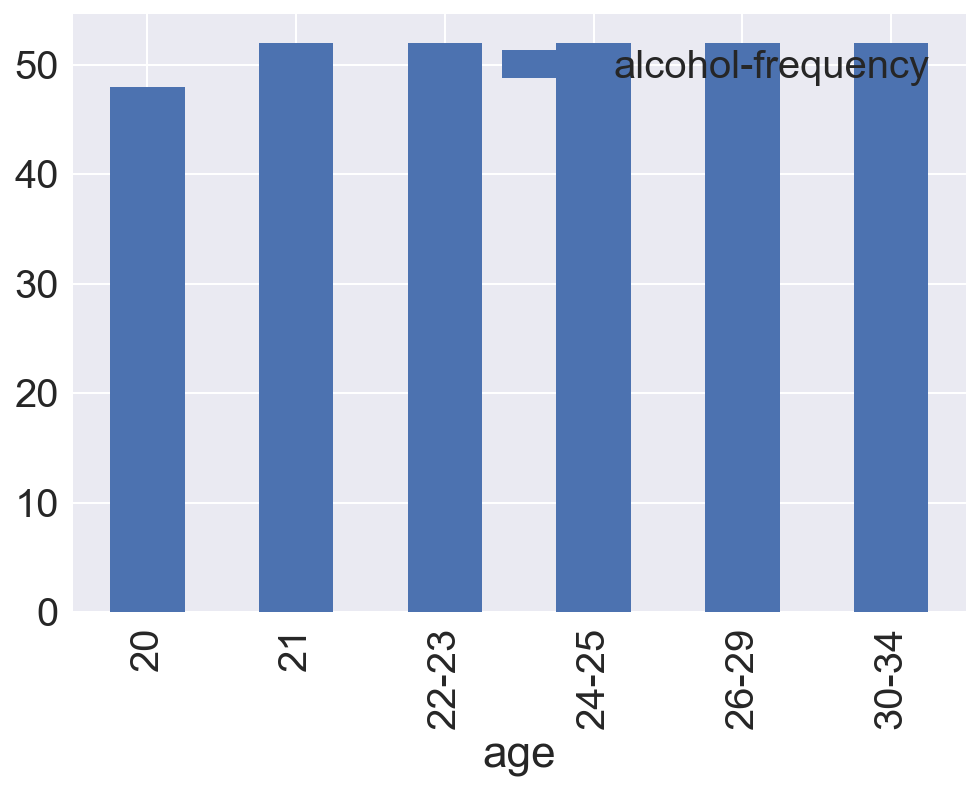

In [48]:
# the frequency of use during the age range is pretty steady into the thirties.
drugs.plot(y="alcohol-frequency", x="age", kind='bar')
None

In [49]:
# calculating correlation between the two data sets
corr_drugs = drugs[['alcohol-use', 'alcohol-frequency',]].corr()
corr_drugs

,alcohol-use,alcohol-frequency
alcohol-use,1.000000,0.897728
alcohol-frequency,0.897728,1.000000


In [50]:
# using pearson as a 'second set of eyes' so to speak and to get the p-value which is low here so thats' reassuring
pear = stats.pearsonr(drugs['alcohol-use'], drugs['alcohol-frequency'])
pear

(0.89772786386474235, 0.015154522447013591)

In [75]:
# standard error is a little high for my likings but it should be compared to the other data sets before making any judements
AU_mean= drugs['alcohol-use'].mean()
AU_std= drugs['alcohol-use'].std(ddof=1)
sem = np.std(drugs['alcohol-use'], ddof=1)/np.sqrt(len(drugs['alcohol-use']))
print(AU_mean)
print(AU_std)
print(sem)

79.73333333333333
5.4752777707315134
2.23527278972


In [76]:
# calculate 95% CI 
# The CI makes me feel much better about this data, with scores like that I feel more confident that the data does have some
# sort of relevant nonerronuous correlation
z = 1.96
lower = AU_mean - z* sem
upper = AU_mean + z* sem
print(lower)
print(upper)

75.3521986655
84.1144680012


In [78]:
# This standard error is very good. 
AF_mean= drugs['alcohol-frequency'].mean()
AF_std= drugs['alcohol-frequency'].std(ddof=1)
sem = np.std(drugs['alcohol-frequency'], ddof=1)/np.sqrt(len(drugs['alcohol-frequency']))
print(AF_mean)
print(AF_std)
print(sem)

51.333333333333336
1.632993161855452
0.666666666667


In [79]:
# calculate 95% CI 
# CI levels aren't as high as I would have liked them to be but not bad.
z = 1.96
lower = AF_mean - z* sem
upper = AF_mean + z* sem
print(lower)
print(upper)

50.0266666667
52.64


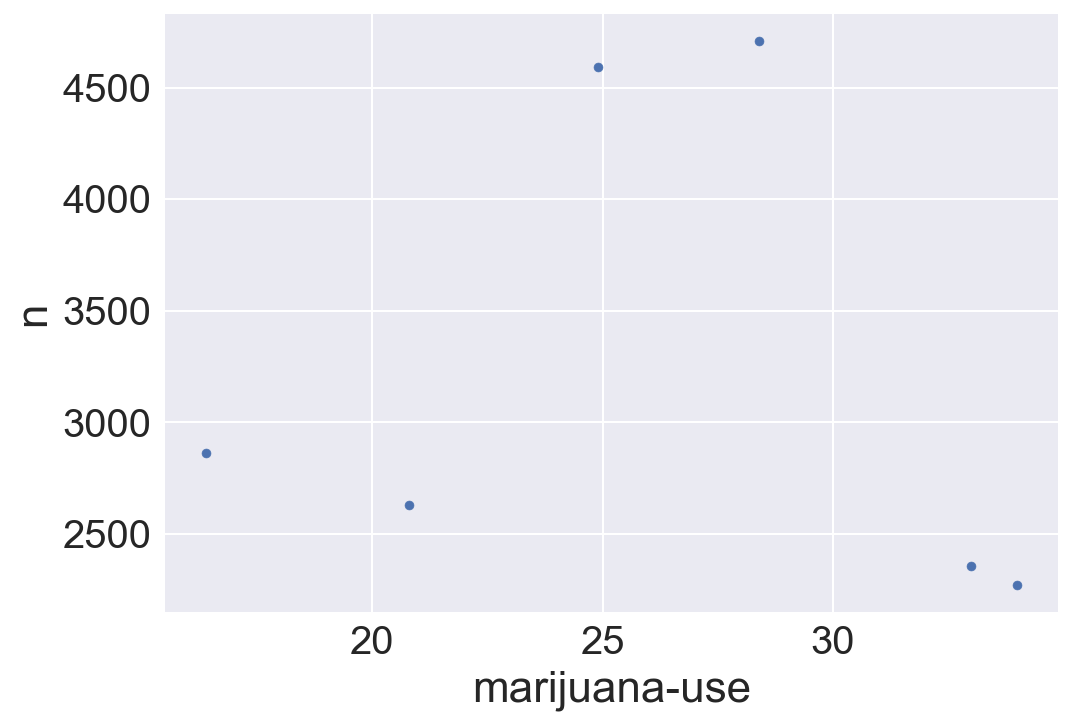

In [51]:
#  The marijuana use is much lower then the alcohol use. The highest instance for the age range is in the 30s
drugs.plot('marijuana-use', 'n', kind= 'scatter', grid=True)
None

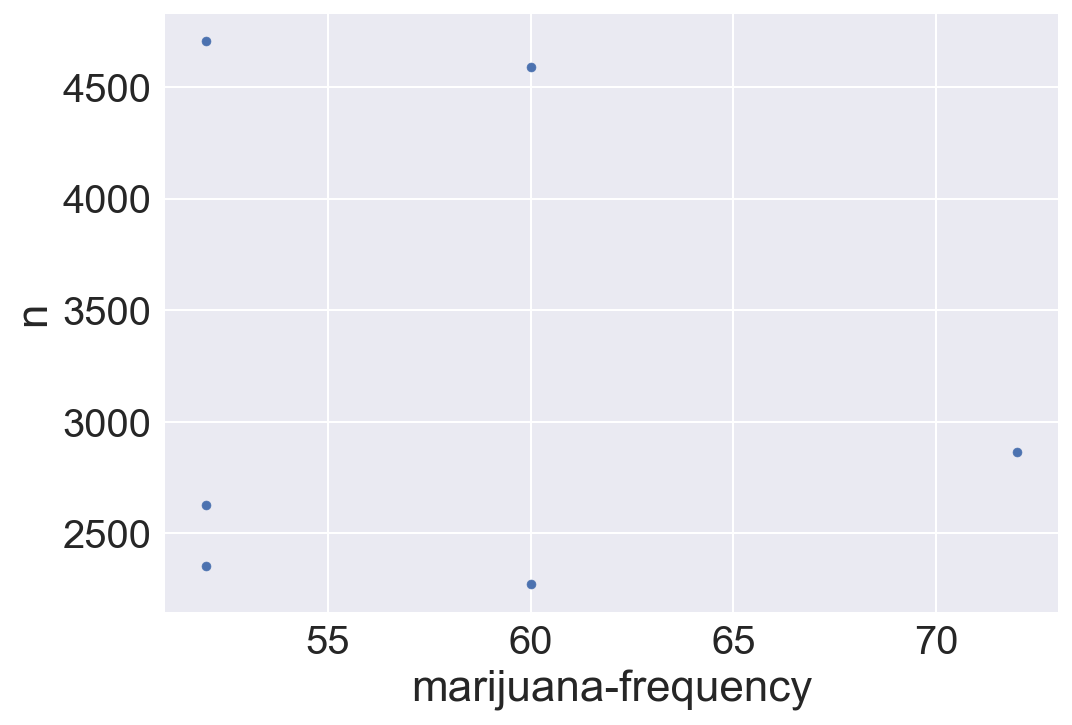

In [65]:
# The frequency of use is much higher for marijuana then compared to alcohol
drugs.plot('marijuana-frequency', 'n', kind= 'scatter', grid=True)
None

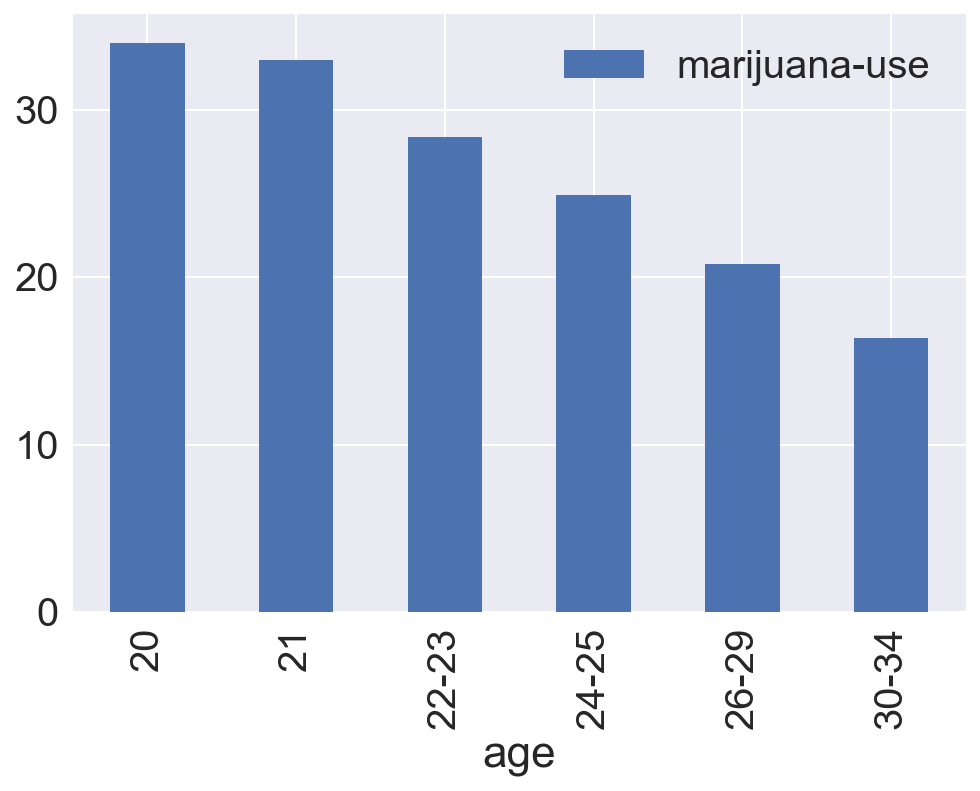

In [66]:
# The use of marijuana is higher for people in their younger twenties and decreases rapidly through to the thiries.
drugs.plot(y="marijuana-use", x="age", kind='bar')
None

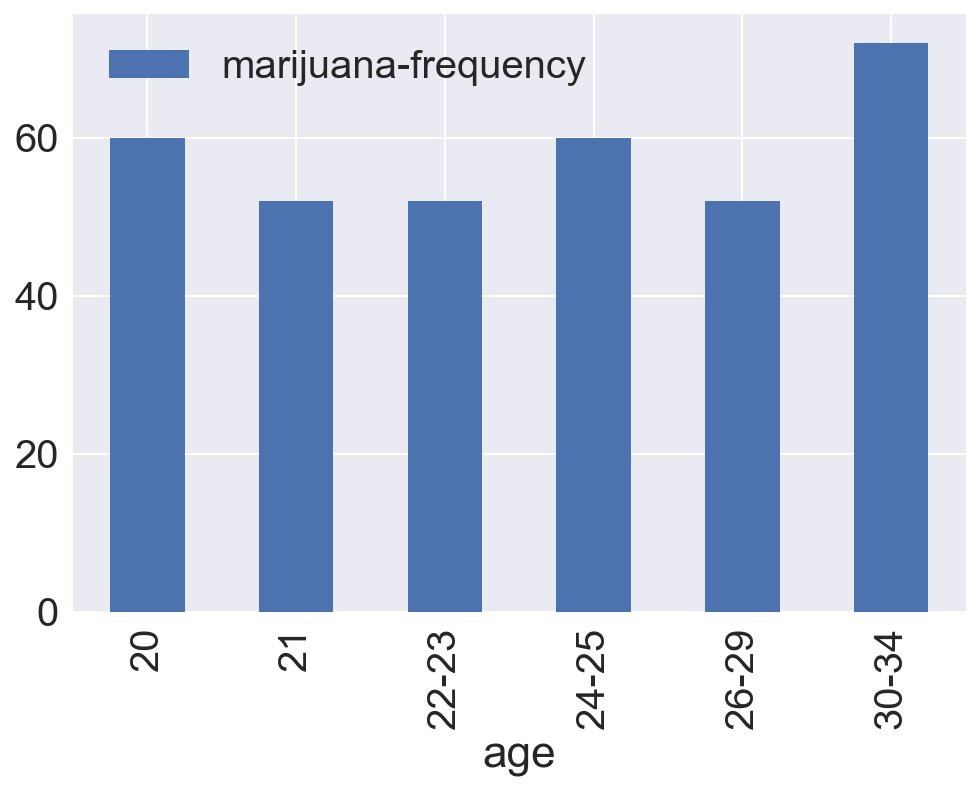

In [64]:
# Interesting how the frequency has an ebb and flow. But increases sharply in the users thirties.
drugs.plot(y="marijuana-frequency", x="age", kind='bar')
None

In [84]:
# calculating correlation between the two data sets
corr_drugs = drugs[['marijuana-use', 'marijuana-frequency']].corr()
corr_drugs

,marijuana-use,marijuana-frequency
marijuana-use,1.000000,-0.534155
marijuana-frequency,-0.534155,1.000000


In [68]:
# p value is a bit higher then I would have liked and the correlation is in the negative which just means as one variable increase
# the other will decrease but for my purposes that isn't very helpful
pear = stats.pearsonr(drugs['marijuana-use'], drugs['marijuana-frequency'])
pear

(-0.53415538672808871, 0.2749700554366683)

In [80]:
# The Standard error is similar to that of the alcohol usage error.
MU_mean= drugs['marijuana-use'].mean()
MU_std= drugs['marijuana-use'].std(ddof=1)
sem = np.std(drugs['marijuana-use'], ddof=1)/np.sqrt(len(drugs['marijuana-use']))
print(MU_mean)
print(MU_std)
print(sem)

26.250000000000004
6.910788667004657
2.82131765906


In [81]:
# calculate 95% CI 
# But these CI scores are disappointing.
z = 1.96
lower = MU_mean - z* sem
upper = MU_mean + z* sem
print(lower)
print(upper)

20.7202173882
31.7797826118


In [82]:
# Again the standard error is higher then then alcohol results.
MF_mean= drugs['marijuana-frequency'].mean()
MF_std= drugs['marijuana-frequency'].std(ddof=1)
sem = np.std(drugs['marijuana-frequency'], ddof=1)/np.sqrt(len(drugs['marijuana-frequency']))
print(MF_mean)
print(MF_std)
print(sem)

58.0
7.899367063252599
3.22490309932


In [83]:
# calculate 95% CI 
# Though these CI scores are somewhat reassuring but not enough to make any final decisions.
z = 1.96
lower = MF_mean - z* sem
upper = MF_mean + z* sem
print(lower)
print(upper)

51.6791899253
64.3208100747


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

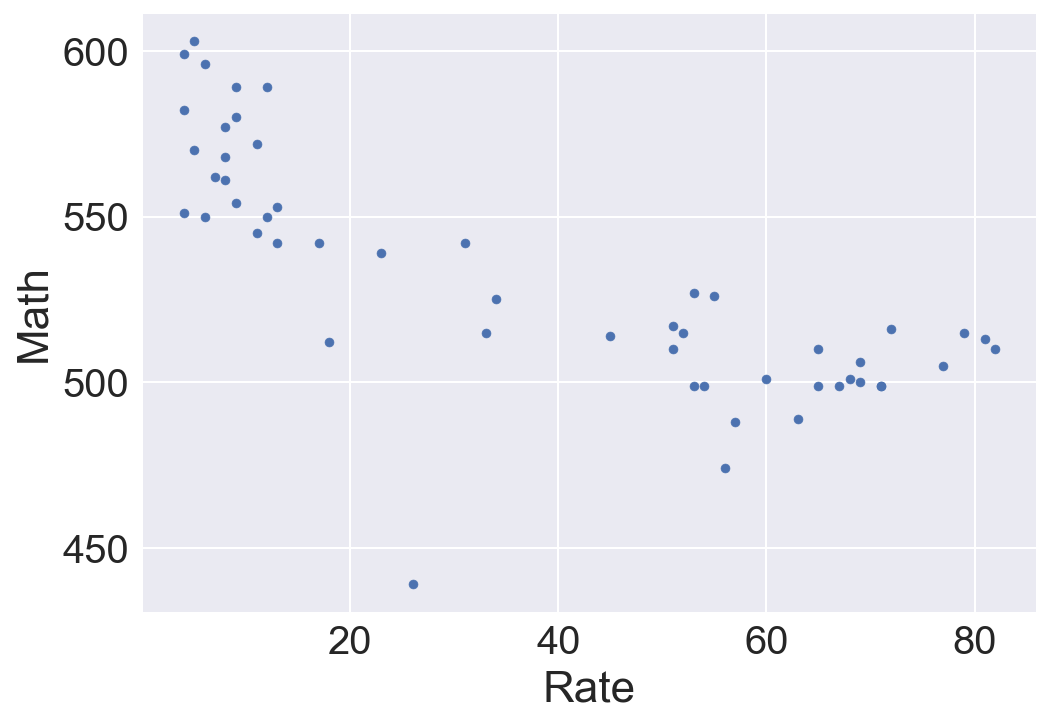

In [52]:
#1/2.Outliers are variables, values, points on a graph that are set apart from the main grouping of numbers. These can be 
# caused by randomness, error, or chance.
# From looking at the graph the outlier seems to be around the 26 Rate with a very low math score. The only other possible
# outliers I see is one around 56 Rate and about a 475 on Math and another at 18 Rate and 515 Math. I'll check the date set.
x='Rate'
y='Math'
sat.plot(x,y, kind = 'scatter', grid=True, logx=False)

In [53]:
sat.iloc[29]

State                WV
Rate                 18
Verbal              527
Math                512
Verbal_Math_diff     15
Name: 29, dtype: object

In [54]:
sat.iloc[27]

State                OH
Rate                 26
Verbal              534
Math                439
Verbal_Math_diff     95
Name: 27, dtype: object

In [55]:
sat.iloc[16]

State                DC
Rate                 56
Verbal              482
Math                474
Verbal_Math_diff      8
Name: 16, dtype: object

In [97]:
#4. Drop the rows
sat.drop(sat.index[29], inplace=True)

In [98]:
sat.drop(sat.index[27], inplace=True)

In [99]:
sat.drop(sat.index[16], inplace=True)

In [96]:
sat.describe()

,Rate,Verbal,Math,Verbal_Math_diff,Percentile
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,37.387755,533.102041,534.959184,-1.857143,50.863422
std,27.825959,33.462818,33.329766,8.100926,29.876268
min,4.000000,485.000000,488.000000,-30.000000,3.846154
25%,9.000000,501.000000,506.000000,-6.000000,25.000000
50%,34.000000,526.000000,526.000000,-1.000000,51.923077
75%,65.000000,562.000000,561.000000,2.000000,77.884615
max,82.000000,593.000000,603.000000,15.000000,100.000000


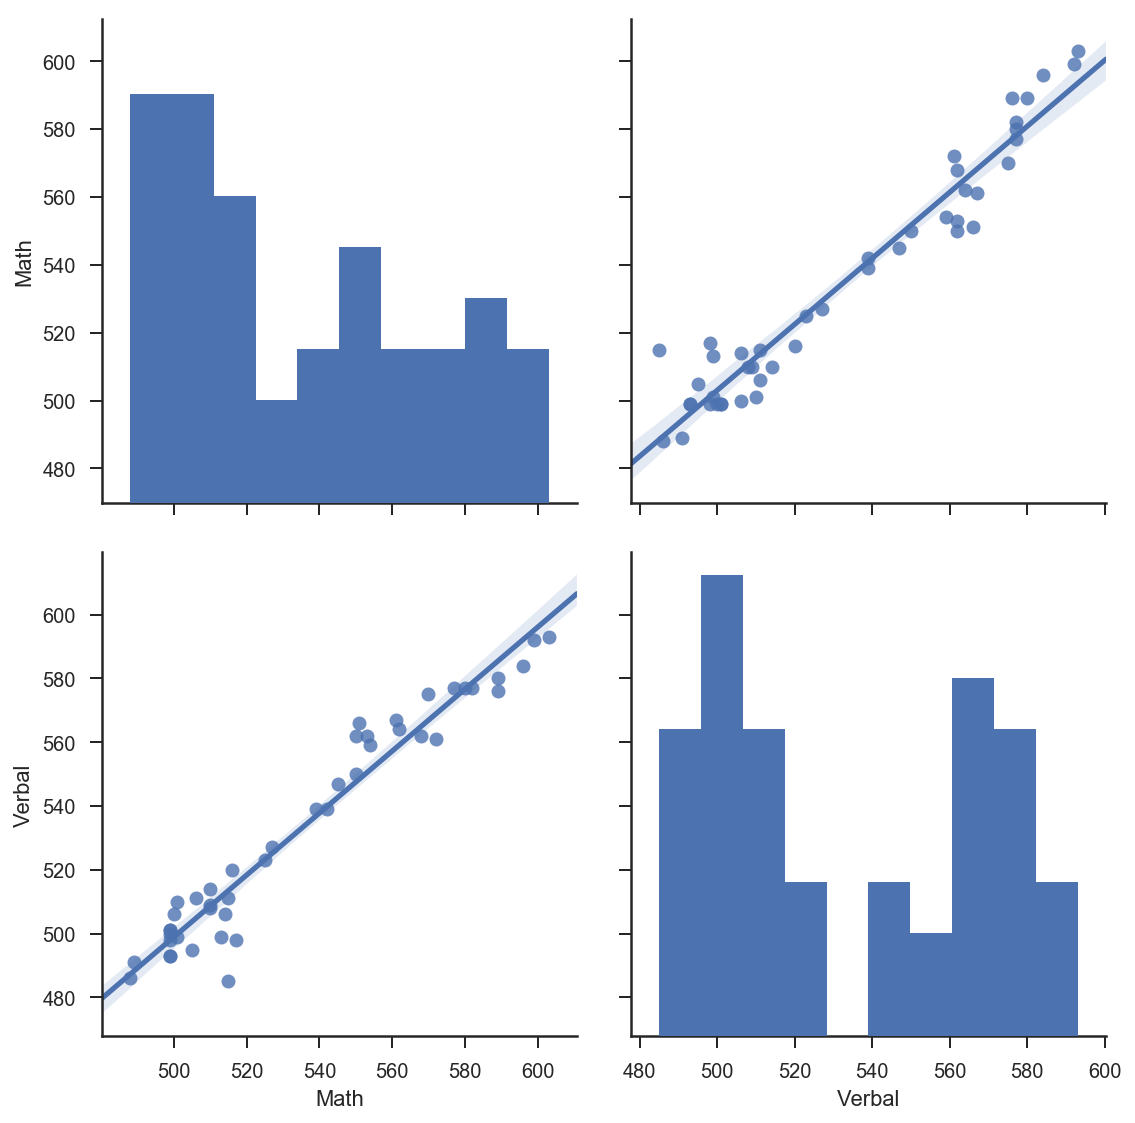

In [114]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(sat, size =4, vars=["Math", "Verbal"], kind= "reg")
None

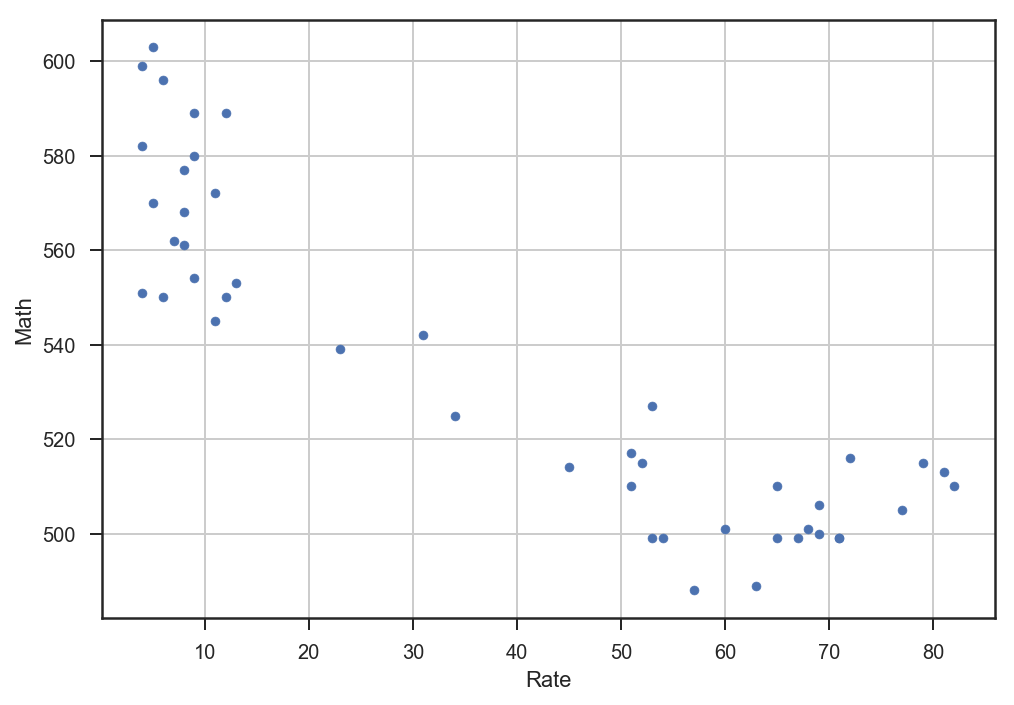

In [115]:
x='Rate'
y='Math'
sat.plot(x,y, kind = 'scatter', grid=True, logx=False)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [57]:
spear = stats.spearmanr(sat.Verbal, sat.Math)
spear

SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

In [58]:
pear = stats.pearsonr(sat.Verbal, sat.Math)
pear

(0.899870852544429, 1.1920026733067679e-19)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [59]:
#initial empty list
percentiles = []
#rate is equal to the column of Rates in the dataframe sat. Was having a hard time figuring out how to pull the data here
#rate=sat['Rate']
#rate=sat.'Rate'
rate=sat.Rate
#start a for loop to initiate scipy built in called stats.percentileofscore and have it run through all states and rates to
#produce a new colum of percentages
for x in rate:
    percentiles.append(stats.percentileofscore(rate,x, kind='rank'))
sat['Percentile'] = percentiles
sat.head(10)

,State,Rate,Verbal,Math,Verbal_Math_diff,Percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692
5,RI,71,501,499,2,89.423077
6,PA,71,500,499,1,89.423077
7,VT,69,511,506,5,85.576923
8,ME,69,506,500,6,85.576923
9,VA,68,510,501,9,82.692308


In [60]:
sat[sat['State']=='CA']

,State,Rate,Verbal,Math,Verbal_Math_diff,Percentile
23,CA,51,498,517,-19,56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.